In [1]:
import pandas as pd

## Produce Graph for Single Alpha

Index(['Unnamed: 0', 'model_key', 'alpha', 'temperature', 'seed', 'iter',
       'loss_train', 'loss_val', 'Expert Utilization', 'Load Imbalance Ratio',
       'Routing Concentration', 'Expert Load Variation',
       'Routing Probability CV'],
      dtype='object')


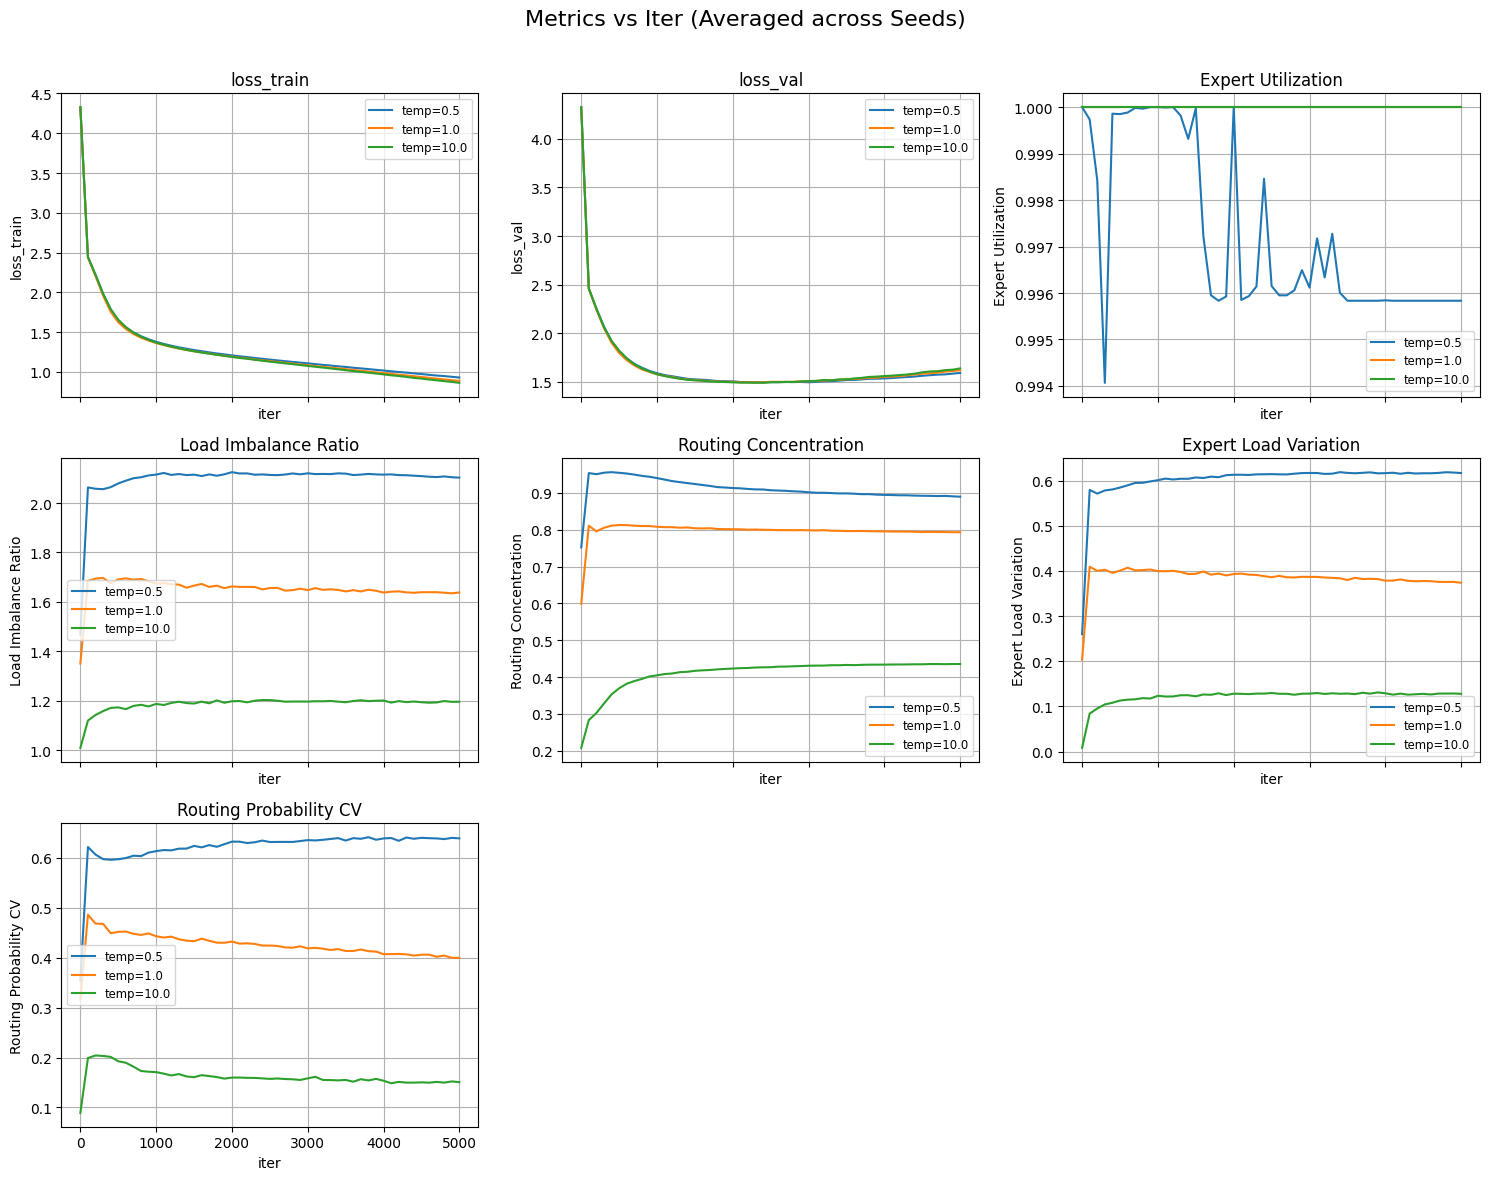

In [2]:
import pandas as pd

df = pd.read_csv('./alpha_2_0.csv')
print(df.columns)

import pandas as pd
import matplotlib.pyplot as plt

# Assume df is already loaded
# df = pd.read_csv("your_file.csv")

# Metrics to plot (y-axis)
metric_cols = ['loss_train', 'loss_val', 'Expert Utilization', 'Load Imbalance Ratio',
               'Routing Concentration', 'Expert Load Variation', 'Routing Probability CV']

# Average across seeds for each (temperature, iter)
grouped_df = df.groupby(['temperature', 'iter'])[metric_cols].mean().reset_index()

# Grid dimensions (adjust as needed)
n_cols = 3
n_rows = -(-len(metric_cols) // n_cols)  # Ceiling division

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

# Plot each metric
for idx, metric in enumerate(metric_cols):
    ax = axes[idx]
    for temp in sorted(df['temperature'].unique()):
        temp_df = grouped_df[grouped_df['temperature'] == temp].sort_values('iter')
        ax.plot(temp_df['iter'], temp_df[metric], label=f'temp={temp}')

    ax.set_title(metric)
    ax.set_xlabel("iter")
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend(fontsize='small')

# Hide unused subplots if any
for j in range(len(metric_cols), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Metrics vs Iter (Averaged across Seeds)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



# Compare Across Alpha

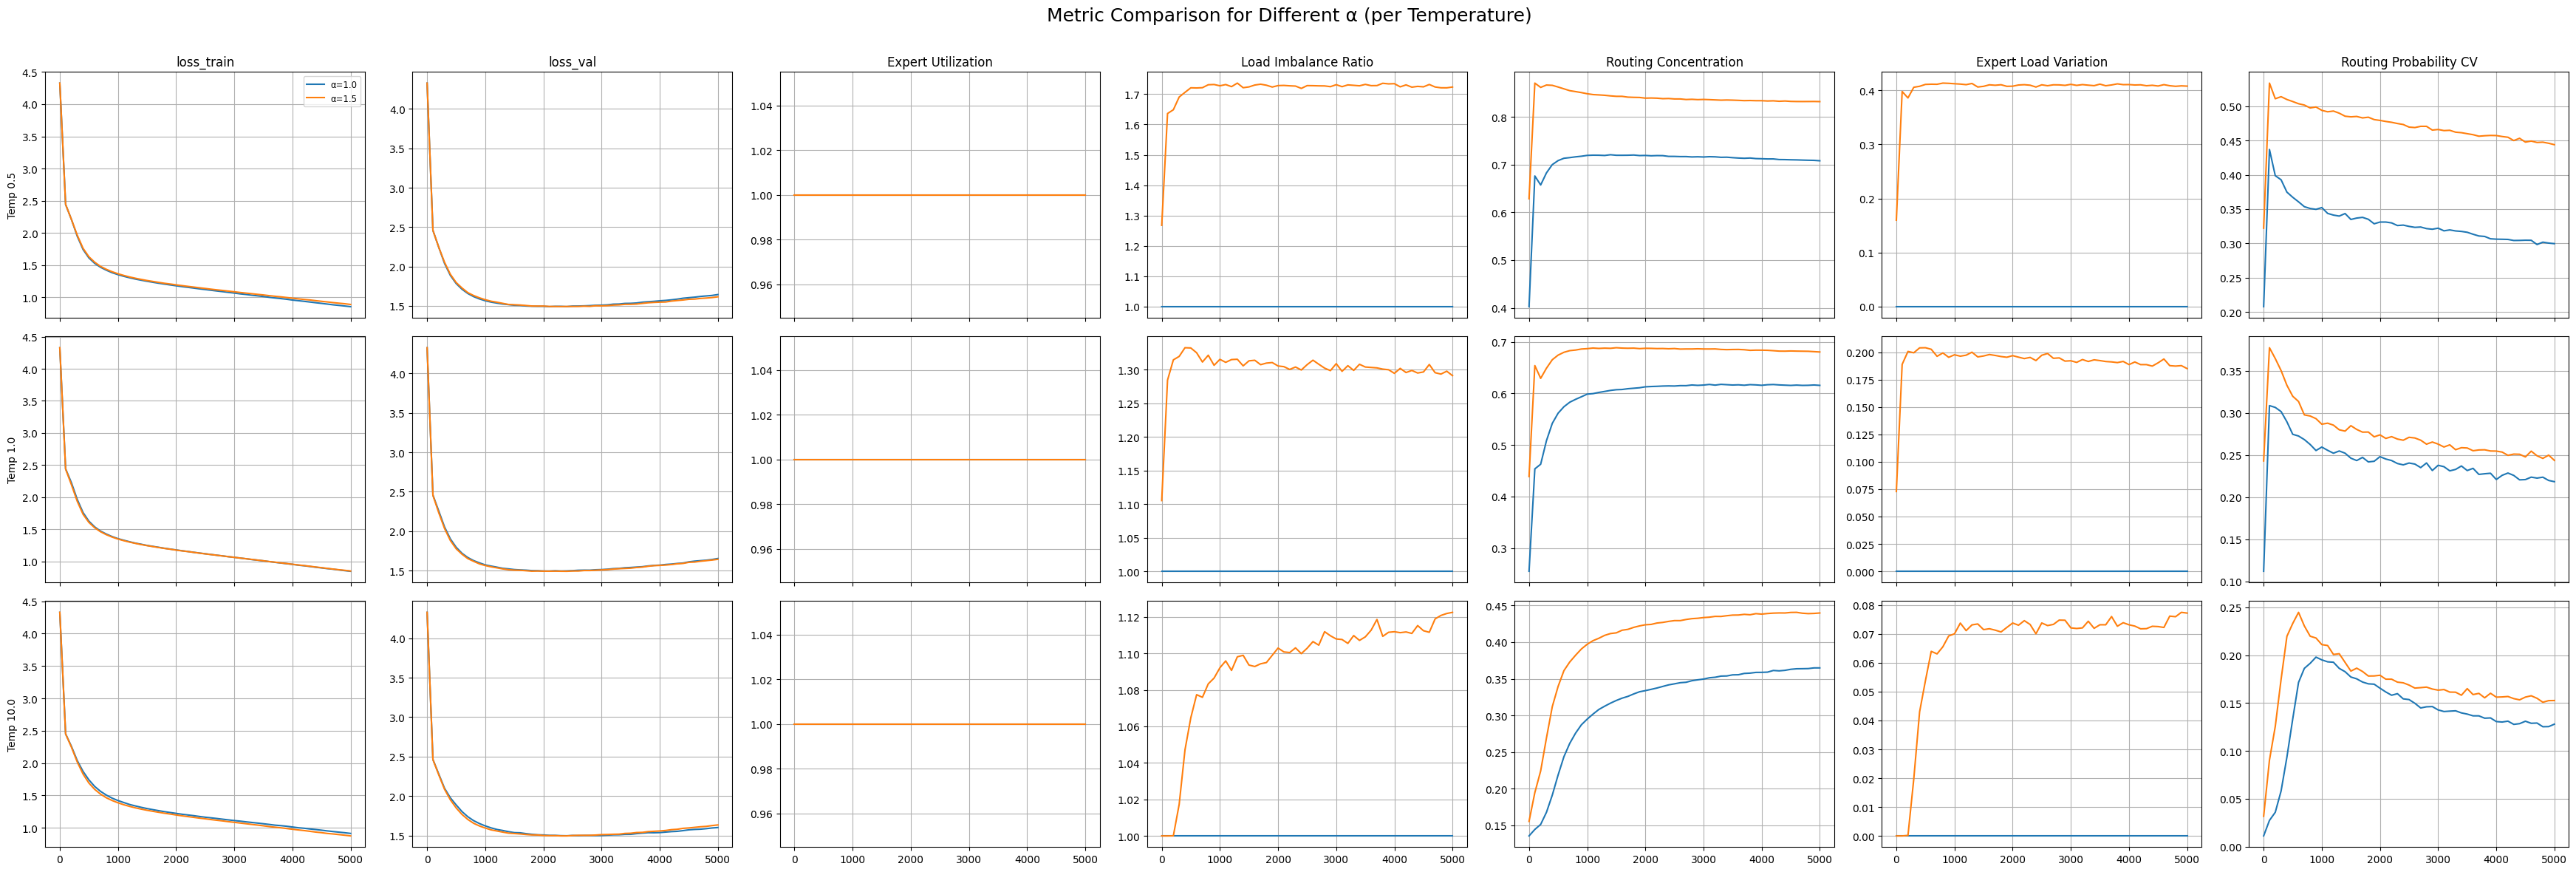

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df1 = pd.read_csv("alpha_1_0.csv")
df2 = pd.read_csv("alpha_1_5.csv")

# Ensure alpha is included
# df1['alpha'] = 1.0
# df2['alpha'] = 1.5

# Combine
df = pd.concat([df1, df2], ignore_index=True)

# Define metrics and unique temps
metric_cols = ['loss_train', 'loss_val', 'Expert Utilization', 'Load Imbalance Ratio',
               'Routing Concentration', 'Expert Load Variation', 'Routing Probability CV']
temps = sorted(df['temperature'].unique())

# Precompute mean across seeds
grouped_df = df.groupby(['temperature', 'alpha', 'iter'])[metric_cols].mean().reset_index()

# Grid dimensions (rows: temperature, cols: metrics)
n_rows = len(temps)
n_cols = len(metric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex='col')
axes = axes.reshape(n_rows, n_cols)

# Plot
for i, temp in enumerate(temps):
    for j, metric in enumerate(metric_cols):
        ax = axes[i, j]
        for alpha in sorted(df['alpha'].unique()):
            sub_df = grouped_df[(grouped_df['temperature'] == temp) & (grouped_df['alpha'] == alpha)].sort_values('iter')
            ax.plot(sub_df['iter'], sub_df[metric], label=f'α={alpha}')
        
        if i == 0:
            ax.set_title(metric)
        if j == 0:
            ax.set_ylabel(f"Temp {temp}")
        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize='small')

fig.suptitle("Metric Comparison for Different α (per Temperature)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
